In [2]:
import numpy as np
from glob import glob
import thunder as td
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
fnames = sorted(glob('/groups/ahrens/ahrenslab/davis/data/epi/20170909/7dpf_cy221xcy221_f11_no_agarose_1/Pos0/*.tif'))
ims = td.images.fromlist(fnames, accessor=imread, engine=sc)

In [46]:
sample = imread(fnames[-1])

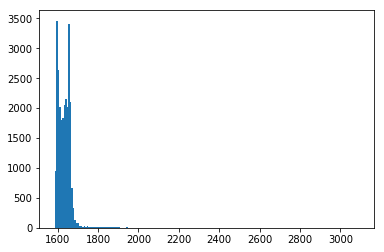

In [47]:
from scipy.ndimage.filters import gaussian_filter
plt.hist(gaussian_filter(sample.astype('float32'), 5).ravel()[::10], 200);

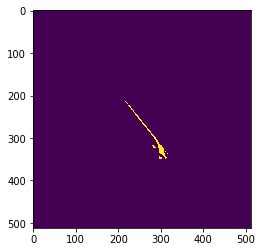

In [48]:
plt.imshow(sample > 1900)

In [49]:
thr = 1900
ims_thr = ims.map(lambda v: v > thr).toarray()

In [9]:
import pyqtgraph as pq
%gui qt

In [50]:
pq.image(ims_thr)

In [51]:
thrs = range(1800, 2400, 100)
def multithr_mean(v, thrs):
    return np.array([v[v > thr].mean() for thr in thrs])
fl_means = ims.map(lambda v: multithr_mean(v, thrs)).toarray()

In [52]:
fl_means.shape

(60000, 6)

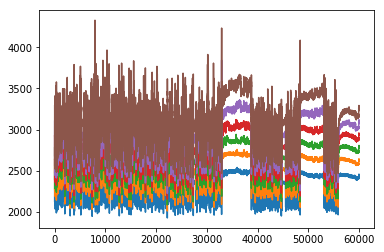

In [53]:
plt.plot(fl_means);

In [22]:
import pyqtgraph as pq
%gui qt

In [54]:
pq.plot(fl_means[:,4])